In [3]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(640, 640)

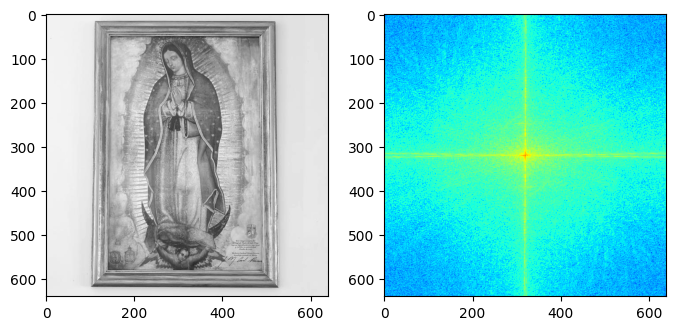

In [4]:
img = cv.imread('Guadalupana.jpg', cv.IMREAD_GRAYSCALE)
img_tf = np.fft.fft2(img)

fig, ax = plt.subplots(1,2, figsize=(8,8))
ax[0].imshow(img, cmap = 'gray')
#Para visualizar la imagen tf, se aplica logaritmo y valores absolutos
ax[1].imshow(20*np.log(np.abs(np.fft.fftshift(img_tf))), cmap='jet')
img.shape

In [5]:
#Se genera la funcion de fitro gaussiano tamaño hxw
def create_gauss_filter(h, w, k_size, sigma):
    space_kernel = np.zeros((h, w))
    kernel_g = cv.getGaussianKernel(ksize=k_size, sigma=sigma)
    kernel_matrix = kernel_g * kernel_g.T
    y_center = (h // 2) - round(k_size / 2)
    x_center = (w // 2) - round(k_size / 2)
    space_kernel[y_center:y_center+k_size, x_center:x_center+k_size] = kernel_matrix
    kernel_tf = np.fft.fft2(space_kernel)
    return space_kernel, kernel_tf

Text(0.5, 1.0, 'Kernel fft')

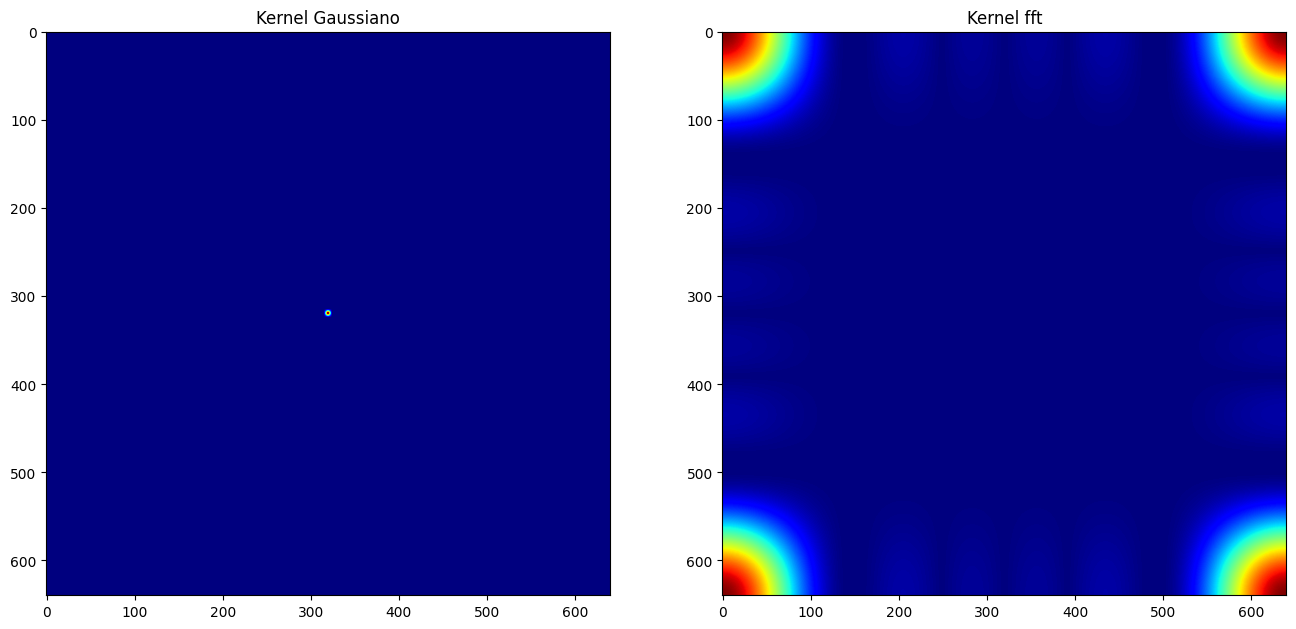

In [6]:
#Se aplica la función
kernel_1, kernel_tf_1 = create_gauss_filter(640, 640, k_size=8, sigma=2)

fig, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(kernel_1, cmap='jet')
ax[0].set_title('Kernel Gaussiano')
ax[1].imshow(np.abs(kernel_tf_1), cmap='jet')
ax[1].set_title('Kernel fft')

Text(0.5, 1.0, 'Kernel fft')

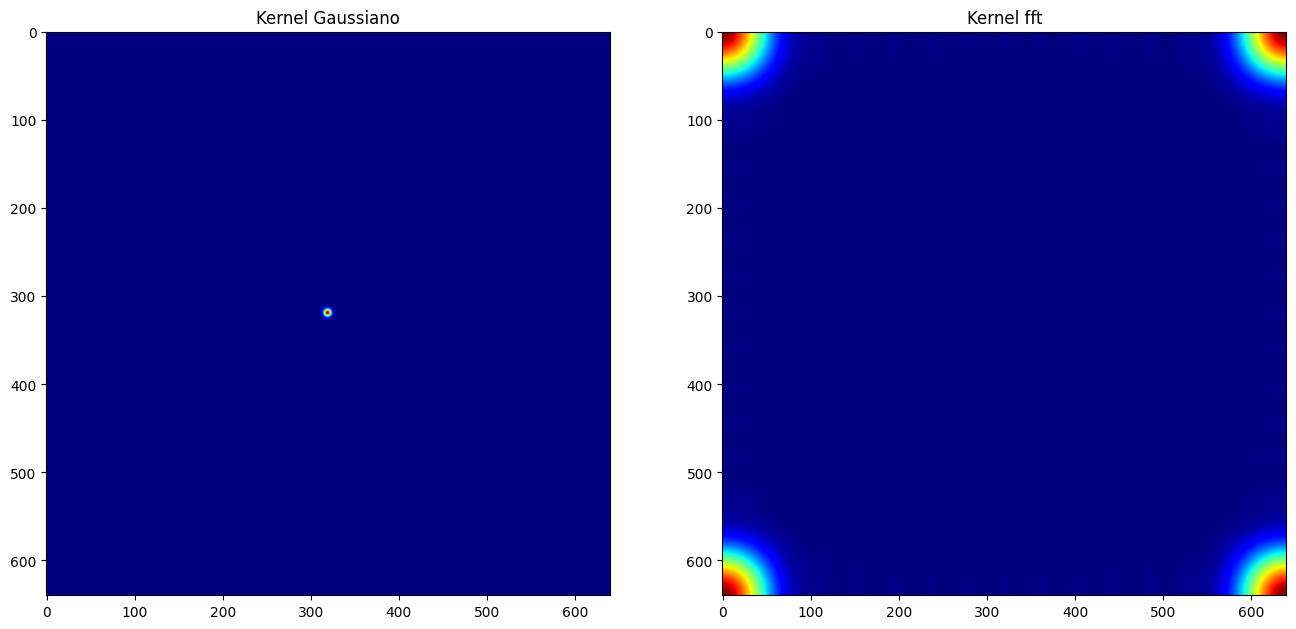

In [16]:
#Se aplica la función con otros valores de k_size y sigma
kernel_1, kernel_tf_1 = create_gauss_filter(640, 640, k_size=15, sigma=3)

fig, ax = plt.subplots(1,2, figsize=(16,16))
ax[0].imshow(kernel_1, cmap='jet')
ax[0].set_title('Kernel Gaussiano')
ax[1].imshow(np.abs(kernel_tf_1), cmap='jet')
ax[1].set_title('Kernel fft')

Text(0.5, 1.0, 'Desenfoque Gaussiano')

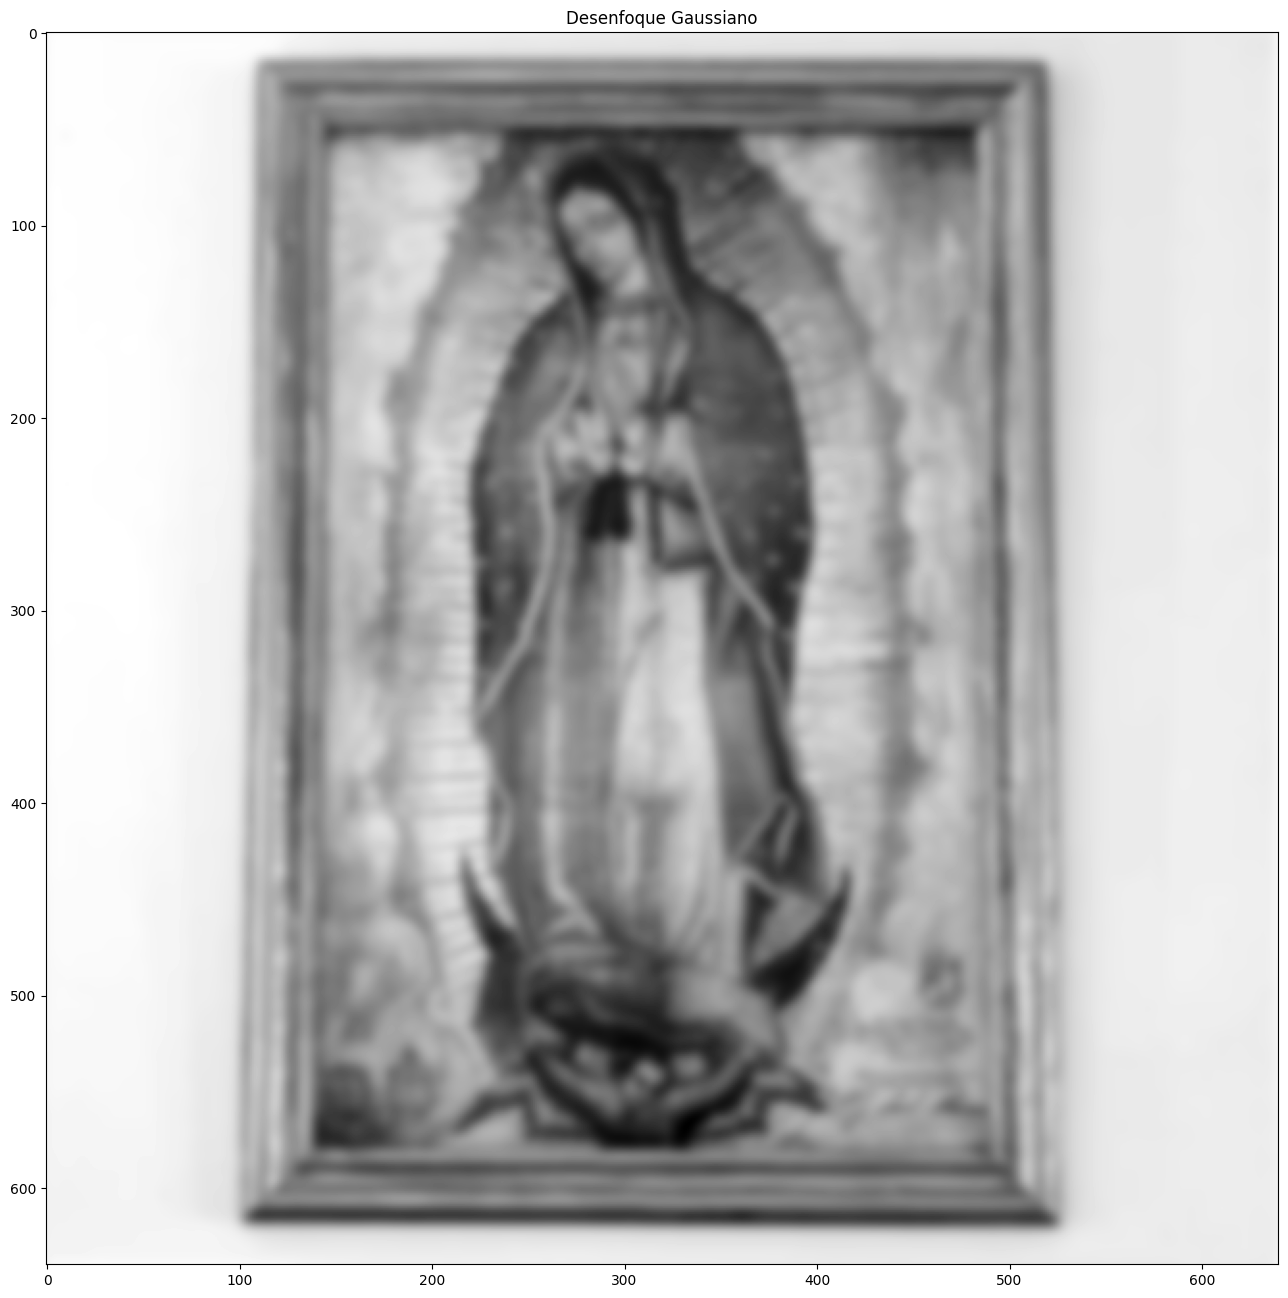

In [17]:
img_filtrada1 = img_tf * kernel_tf_1

img_gaussiana1 = np.fft.ifftshift(np.real(np.fft.ifft2(img_filtrada1)))
plt.figure(figsize=(16,16))
plt.imshow(img_gaussiana1, cmap='gray')
plt.title('Desenfoque Gaussiano')


De acuerdo al Metodo descripto en el peper:

Algorithm for image quality measure
Input: Image I of size M×N.
Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure
Step 1: Compute F which is the Fourier Transform representation of image I
Step 2: Find Fc which is obtained by shifting the origin of F to centre.
Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of image I.
Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F.
Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000.
Step 6: Calculate Image Quality measure (FM) from equation (1).
Image Quality Measure (FM)= Th/(MxN)


Se replica el metodo con las imagenes de este trabajo:

In [22]:
img_F = np.fft.fft2(img_gaussiana1)
img_Fc = np.fft.fftshift(img_F)
img_AF = np.abs(img_Fc)
max_M = np.max(img_AF)
th = max_M / 1000
count_Th = (img_F > th).sum()
IQM_FM_A = count_Th / ( img_gaussiana1.shape[0] * img_gaussiana1.shape[1])
print(IQM_FM_A*1000)   

0.84716796875


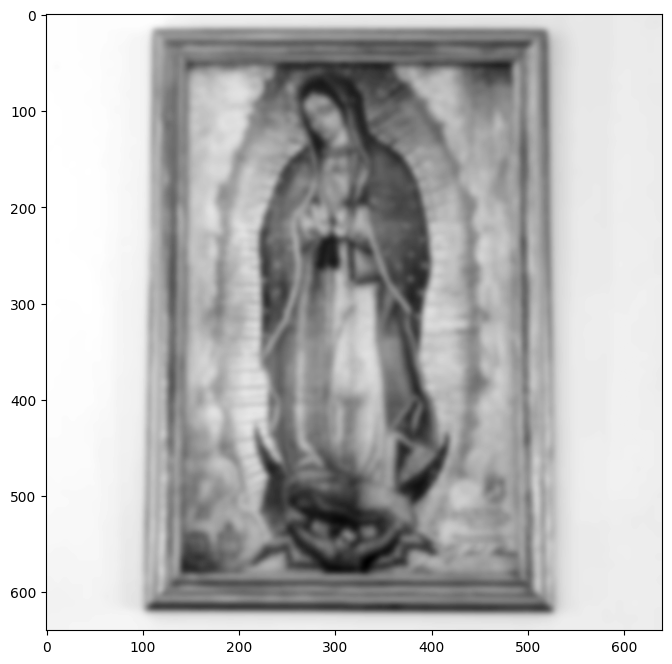

In [19]:
img_gaussianaBlur = cv.GaussianBlur(img, (15,15), sigmaX=3)
plt.figure(figsize=(8,8))
plt.imshow(img_gaussianaBlur, cmap='gray')

In [21]:
img_F = np.fft.fft2(img_gaussianaBlur)
img_Fc = np.fft.fftshift(img_F)
img_AF = np.abs(img_Fc)
max_M = np.max(img_AF)
th = max_M / 1000
count_Th = (img_F > th).sum()
IQM_FM_B = count_Th / ( img_gaussianaBlur.shape[0] * img_gaussiana1.shape[1])
print(IQM_FM_B*1000) 

0.83251953125


In [32]:
#Se comparan los resultados de indices de calidad
print(((IQM_FM_A/IQM_FM_B)-1)*100, "%")

1.7595307917888547 %


Una diferencia de 1,75% entre los dos metodos

943.7242650710049


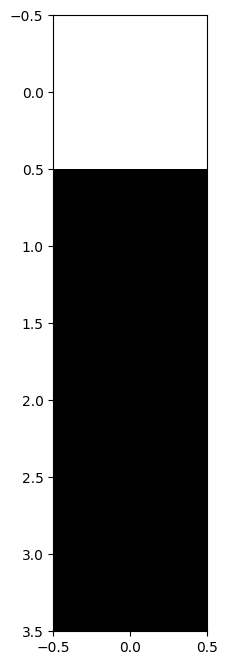

In [46]:
img_LAP4 = np.abs(np.std(cv.Laplacian(img, cv.CV_64F)) ** 2)
abs_LAP4 = cv.convertScaleAbs(img_LAP4)
plt.figure(figsize=(8,8))
plt.imshow(abs_LAP4, cmap='gray')
print(img_LAP4)

255


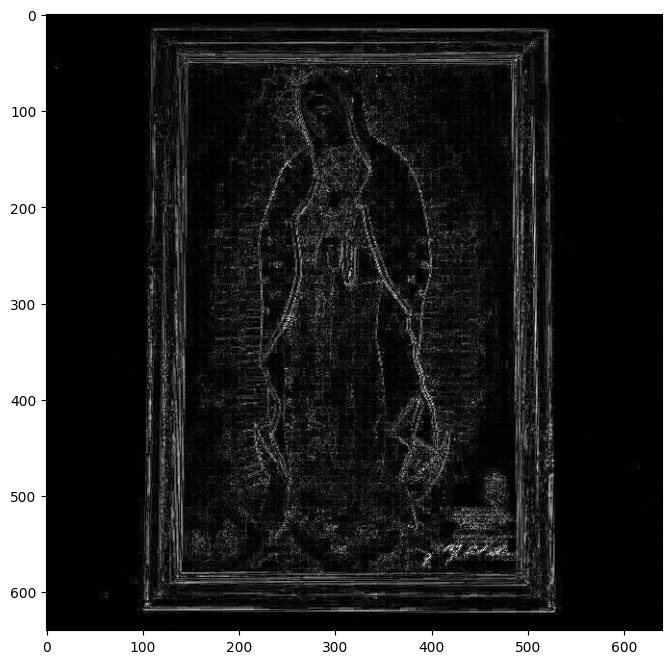

In [54]:
img_MLOG = cv.convertScaleAbs(cv.Laplacian(img, 3))
plt.figure(figsize=(8,8))
plt.imshow(img_MLOG, cmap='gray')
print(np.max(img_MLOG))

In [50]:
#TENG
gaussianX = cv.Sobel(img, cv.CV_64F, 1, 0)
gaussianY = cv.Sobel(img, cv.CV_64F, 1, 0)
print(np.mean(gaussianX * gaussianX + gaussianY * gaussianY))


11421.843466796876


In [51]:
#LAP2 imagen original
kernel = np.array([-1, 2, -1])
laplacianX = np.abs(cv.filter2D(img, -1, kernel))
laplacianY = np.abs(cv.filter2D(img, -1, kernel.T))
print(np.mean(laplacianX + laplacianY))

7.772109375


In [52]:
#LAP2 imagen gaussiana
kernel = np.array([-1, 2, -1])
laplacianX = np.abs(cv.filter2D(img_gaussiana1, -1, kernel))
laplacianY = np.abs(cv.filter2D(img_gaussiana1, -1, kernel.T))
print(np.mean(laplacianX + laplacianY))

0.6533716804233485


In [53]:
#LAP2 imagen gaussianaBlur
kernel = np.array([-1, 2, -1])
laplacianX = np.abs(cv.filter2D(img_gaussianaBlur, -1, kernel))
laplacianY = np.abs(cv.filter2D(img_gaussianaBlur, -1, kernel.T))
print(np.mean(laplacianX + laplacianY))

0.515390625
